KOKEILEN TIEDOSTON SIIRTOA GITHUBIIN SUORAAN COLABISTA. TÄMÄ ON **VAIN** OSA PROJEKTIA. KOKO PROJEKTIN SIIRRÄN GITHUBIIN MA 6.2.

Lineaarinen regressio aineistosta YO_0_linregr01.xlsx, aineisto normalisoitu

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:

df = pd.read_excel("YO_0_linregr_01.xlsx")
df

,majoitusmuoto,matkakohde,matkan tarkoitus,matkan tyyppi,vuosi,matkat yön yli lkm tuhansia,yöpymiset lkm tuhansia,matkan ka kesto yötä,matkan med kesto yötä
0,Yhteensä KOTI VA,1,1,11,1,26770,73470,2.7,2
1,Yhteensä KOTI T,1,2,12,1,4140,8270,2.0,1
2,Yhteensä ULKO VA,2,1,21,1,7100,43610,6.1,4
3,Yhteensä ULKO T,2,2,22,1,1950,9780,5.0,2
4,Yhteensä KOTI VA,1,1,11,2,26530,75620,2.9,2
5,Yhteensä KOTI T,1,2,12,2,3950,7160,1.8,1
6,Yhteensä ULKO VA,2,1,21,2,6990,42470,6.1,3
7,Yhteensä ULKO T,2,2,22,2,1580,6380,4.0,2
8,Yhteensä KOTI VA,1,1,11,3,25210,71830,2.8,2
9,Yhteensä KOTI T,1,2,12,3,3640,7000,1.9,1


In [ ]:
print(df.dtypes)

majoitusmuoto                   object
matkakohde                       int64
matkan tarkoitus                 int64
matkan tyyppi                    int64
vuosi                            int64
matkat yön yli lkm tuhansia      int64
yöpymiset lkm tuhansia           int64
matkan ka kesto yötä           float64
matkan med kesto yötä            int64
dtype: object


In [ ]:

df.describe()

,matkakohde,matkan tarkoitus,matkan tyyppi,vuosi,matkat yön yli lkm tuhansia,yöpymiset lkm tuhansia,matkan ka kesto yötä,matkan med kesto yötä
count,40.00000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1.50000,1.50000,16.500000,5.500000,9179.750000,32354.000000,4.312500,2.375000
std,0.50637,0.50637,5.088952,2.908872,9914.195854,29819.668763,2.266726,1.004796
min,1.00000,1.00000,11.000000,1.000000,280.000000,2100.000000,1.800000,1.000000
25%,1.00000,1.00000,11.750000,3.000000,1957.500000,7212.500000,2.800000,2.000000
50%,1.50000,1.50000,16.500000,5.500000,3905.000000,12760.000000,3.900000,2.000000
75%,2.00000,2.00000,21.250000,8.000000,11022.500000,52862.500000,5.825000,3.000000
max,2.00000,2.00000,22.000000,10.000000,27720.000000,97450.000000,11.400000,5.000000


In [ ]:
#poistettu majoitusmuoto -muuttuja, koska normalisoinnissa MinMaxScaler() ilmoittaa siitä virheen, koska on string tyyppiä
df1 = df.iloc[:,1:]
df1

,matkakohde,matkan tarkoitus,matkan tyyppi,vuosi,matkat yön yli lkm tuhansia,yöpymiset lkm tuhansia,matkan ka kesto yötä,matkan med kesto yötä
0,1,1,11,1,26770,73470,2.7,2
1,1,2,12,1,4140,8270,2.0,1
2,2,1,21,1,7100,43610,6.1,4
3,2,2,22,1,1950,9780,5.0,2
4,1,1,11,2,26530,75620,2.9,2
5,1,2,12,2,3950,7160,1.8,1
6,2,1,21,2,6990,42470,6.1,3
7,2,2,22,2,1580,6380,4.0,2
8,1,1,11,3,25210,71830,2.8,2
9,1,2,12,3,3640,7000,1.9,1


In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = scaler.fit_transform(df1)

In [ ]:

df1 = pd.DataFrame(df1, columns =['matkakohde', 'matkan tarkoitus', 'matkan tyyppi', 'vuosi', 'matkat yön yli lkm tuhansia', 'yöpymiset lkm tuhansia', 'matkan ka kesto yötä', 'matkan med kesto yötä'])
df1

,matkakohde,matkan tarkoitus,matkan tyyppi,vuosi,matkat yön yli lkm tuhansia,yöpymiset lkm tuhansia,matkan ka kesto yötä,matkan med kesto yötä
0,0.0,0.0,0.000000,0.000000,0.965379,0.748506,0.093750,0.25
1,0.0,1.0,0.090909,0.000000,0.140671,0.064709,0.020833,0.00
2,1.0,0.0,0.909091,0.000000,0.248542,0.435343,0.447917,0.75
3,1.0,1.0,1.000000,0.000000,0.060860,0.080545,0.333333,0.25
4,0.0,0.0,0.000000,0.111111,0.956633,0.771054,0.114583,0.25
5,0.0,1.0,0.090909,0.111111,0.133746,0.053068,0.000000,0.00
6,1.0,0.0,0.909091,0.111111,0.244534,0.423388,0.447917,0.50
7,1.0,1.0,1.000000,0.111111,0.047376,0.044887,0.229167,0.25
8,0.0,0.0,0.000000,0.222222,0.908528,0.731306,0.104167,0.25
9,0.0,1.0,0.090909,0.222222,0.122449,0.051390,0.010417,0.00


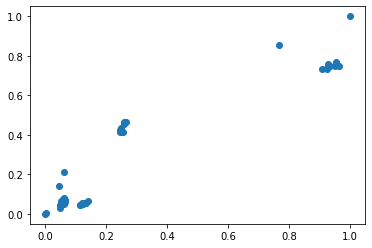

In [ ]:

plt.scatter(df1['matkat yön yli lkm tuhansia'], df1['yöpymiset lkm tuhansia'])
plt.show()



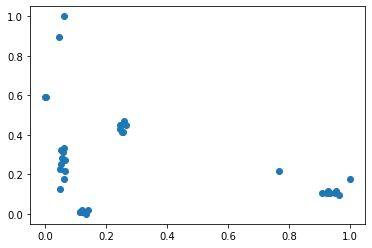

In [ ]:

plt.scatter(df1['matkat yön yli lkm tuhansia'], df1['matkan ka kesto yötä'])
plt.show()

In [ ]:

# muutetaan muuttujanimet
trip = df1['matkat yön yli lkm tuhansia']
overnight = df1['yöpymiset lkm tuhansia']


In [ ]:

trip = np.array(trip).reshape(-1,1) # pitää olla numpyn 2D taulu
overnight = np.array(overnight).reshape(-1,1)
trip

array([[0.96537901],
       [0.14067055],
       [0.24854227],
       [0.06086006],
       [0.95663265],
       [0.13374636],
       [0.24453353],
       [0.04737609],
       [0.9085277 ],
       [0.12244898],
       [0.24599125],
       [0.05174927],
       [0.9271137 ],
       [0.11479592],
       [0.25400875],
       [0.05029155],
       [0.93476676],
       [0.13046647],
       [0.25364431],
       [0.05867347],
       [0.95116618],
       [0.12755102],
       [0.26567055],
       [0.05393586],
       [0.92565598],
       [0.11516035],
       [0.25911079],
       [0.0648688 ],
       [0.92747813],
       [0.12062682],
       [0.25765306],
       [0.06450437],
       [0.76895044],
       [0.06122449],
       [0.06122449],
       [0.00327988],
       [1.        ],
       [0.04992711],
       [0.0451895 ],
       [0.        ]])

In [ ]:

malli = linear_model.LinearRegression()
malli.fit(trip,overnight)

LinearRegression()

In [ ]:

#uudet muuttujat trip1 ja overnight1, predict overnight kun trip on 0.8

overnight1 = np.full((1,1),0.8) # pitää olla numpyn 2D taulu
trip1 = malli.predict(overnight1)
trip1

array([[0.703306]])

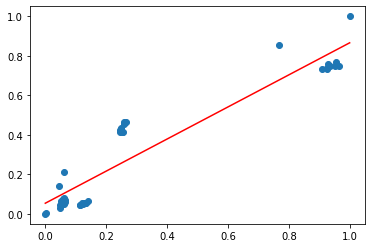

In [ ]:

#piirretään regressiosuora
# valittu suoralle alku 0 ja loppu 1 trip muuttujan arvojen perusteella

trip2 = np.linspace(0,1,2).reshape(-1,1)
overnight2 = malli.predict(trip2)
plt.plot(trip2, overnight2, color="red") # tekee regressiosuoran
plt.scatter(trip, overnight)
plt.show()


In [ ]:

from sklearn import metrics

# tähän alkuperäiset trip ja overnight

overnight_hat = malli.predict(trip)
print('Mean Absolute Error:', metrics.mean_absolute_error(overnight, overnight_hat)) 
print('Mean Squared Error:', metrics.mean_squared_error(overnight, overnight_hat)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(overnight, overnight_hat)))
print('R2 value:', metrics.r2_score(overnight, overnight_hat))


Mean Absolute Error: 0.0940874511656582
Mean Squared Error: 0.011540111050495707
Root Mean Squared Error: 0.10742490889219179
R2 value: 0.8789844616554054
